In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
import os

In [2]:
print(os.getcwd())

C:\Users\BIN


In [3]:
Google = pd.read_csv("googleplaystore.csv")

In [4]:
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
Apple = pd.read_csv("AppleStore.csv")

In [6]:
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [7]:
Google[['Category', 'Rating', 'Reviews', 'Price']]

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0
...,...,...,...,...
10836,FAMILY,4.5,38,0
10837,FAMILY,5.0,4,0
10838,MEDICAL,NaN,3,0
10839,BOOKS_AND_REFERENCE,4.5,114,0


In [8]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0
...,...,...,...,...
10836,FAMILY,4.5,38,0
10837,FAMILY,5.0,4,0
10838,MEDICAL,NaN,3,0
10839,BOOKS_AND_REFERENCE,4.5,114,0


In [9]:
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [10]:
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

In [11]:
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


## 2a. Check the data types for both Apple and Google, and fix them

In [12]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [13]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [14]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [15]:
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [16]:
Google=Google[Google['Price'] != 'Everyone']
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
nosymb=Google['Price'].str.replace('$','')

In [26]:
nosymb

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [29]:
Google['Price'] = pd.to_numeric(nosymb)

C:\Users\BIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
Google['Price'].dtypes

dtype('float64')

## 2b. Add a platform column to both the Apple and the Google dataframes 

In [34]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

C:\Users\BIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 2c. Changing the column names to prepare for our join of the two datasets 

In [51]:
old_names = Apple.columns
new_names = Google.columns
Apple = Apple.rename(columns = dict(zip(old_names, new_names)))

## 2d. Joint the two datasets

In [59]:
df = Google.append(Apple, ignore_index = True)
Google.sample(12)

,Category,Rating,Reviews,Price,platform
3955,GAME,3.1,50,0.00,google
10468,LIFESTYLE,3.6,346,0.00,google
5821,GAME,4.3,6,0.00,google
5984,FAMILY,4.4,7,0.00,google
8510,LIFESTYLE,NaN,0,0.00,google
7848,FAMILY,3.9,3253,0.00,google
10066,PERSONALIZATION,3.7,21,0.99,google
5043,FAMILY,3.9,12,0.00,google
1828,GAME,4.5,73539,0.00,google
3927,GAME,4.3,47698,0.00,google


## 2e. Eliminate the NaN values 

In [61]:
print(df.shape)

(18037, 5)


In [62]:
df = df.dropna()

In [63]:
print(df.shape)

(16563, 5)


## 2f. Filter the data so that we only see whose apps that have been reviewed at least once 

In [64]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [65]:
df = df[df['Reviews'] != 0]


## 2g. Summarize the data visually and analytically (by the column platform) 

In [88]:
df_2 = df.groupby('platform')
df_2.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.00,google
1,ART_AND_DESIGN,3.9,967,0.00,google
2,ART_AND_DESIGN,4.7,87510,0.00,google
3,ART_AND_DESIGN,4.5,215644,0.00,google
4,ART_AND_DESIGN,4.3,967,0.00,google
10840,Games,4.0,21292,3.99,apple
10841,Productivity,4.0,161065,0.00,apple
10842,Weather,3.5,188583,0.00,apple
10843,Shopping,4.0,262241,0.00,apple
10844,Reference,4.5,985920,0.00,apple


In [78]:
df_2['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


apple          AxesSubplot(0.1,0.15;0.363636x0.75)
google    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

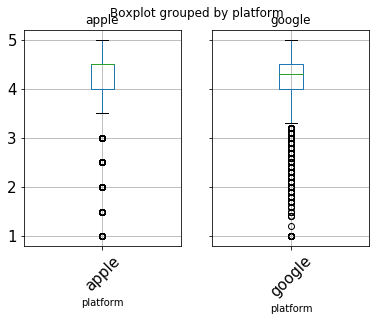

In [86]:
df_2.boxplot(by='platform', column=['Rating'], rot=45, fontsize=15)

apple          AxesSubplot(0.1,0.15;0.363636x0.75)
google    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

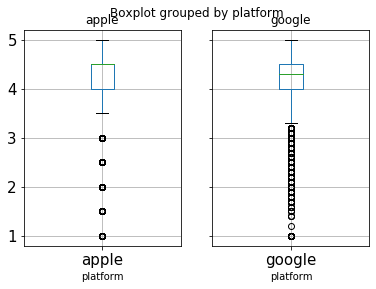

In [87]:
df_2.boxplot(by='platform', column=['Rating'], fontsize=15)